In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("list_oralmicrobiomepapers.txt", sep="\t", header=None)

##The text file above was obtained from a script i used in linux environment, with Entrez Direct, similar to this one:
esearch -db pubmed -query "microbiome" | efetch -format docsum | xtract -pattern DocumentSummary -element Title SortFirstAuthor PubDate  > list.txtsee link for more information: https://www.ncbi.nlm.nih.gov/books/NBK179288/

In [18]:
df.head()

,0,1,2
0,"Oral nanomedicine for modulating immunity, int...",Moon JJ,2021 Oct 25
1,A potential pathogenic association between per...,Kamada N,2021 Oct 28
2,One Health Implications of Antimicrobial Resis...,de Souza Collares Maia Castelo-Branco D,2021 Oct 28
3,Oral Pathobiont-Induced Changes in Gut Microbi...,Yamazaki K,2021
4,Uncovering the Oral Dysbiotic Microbiota as Ma...,Sochalska M,2021


In [2]:
df.columns = ["title", "last_author", "date"]
#df.tail()

In [3]:
def get_year(address):
    return address.split(" ")[0].strip(" ").split("-")[0] #there were some lines showing 1970-1971
df['year'] = df['date'].apply(lambda x: f"{get_year(str(x))}")
#df.head()

In [4]:
df['count'] = 1
#df.tail()
#paper_count = df.groupby(['year']).count()
#paper_count.head()
#df = df.groupby(['year']).count()
#df.head()

In [5]:
paper_count = df[["year", "count"]]
#paper_count.head()

In [6]:
paper_count = paper_count.groupby(['year']).count().dropna()
#paper_count.dropna()
paper_count.tail()

,count
year,
2018,996
2019,1292
2020,1639
2021,1829
nan,14


In [7]:
#drop the last row that has nan

paper_count = paper_count[:-1]
paper_count.tail()
#paper_count.to_csv("paper_count.csv")

,count
year,
2017,800
2018,996
2019,1292
2020,1639
2021,1829


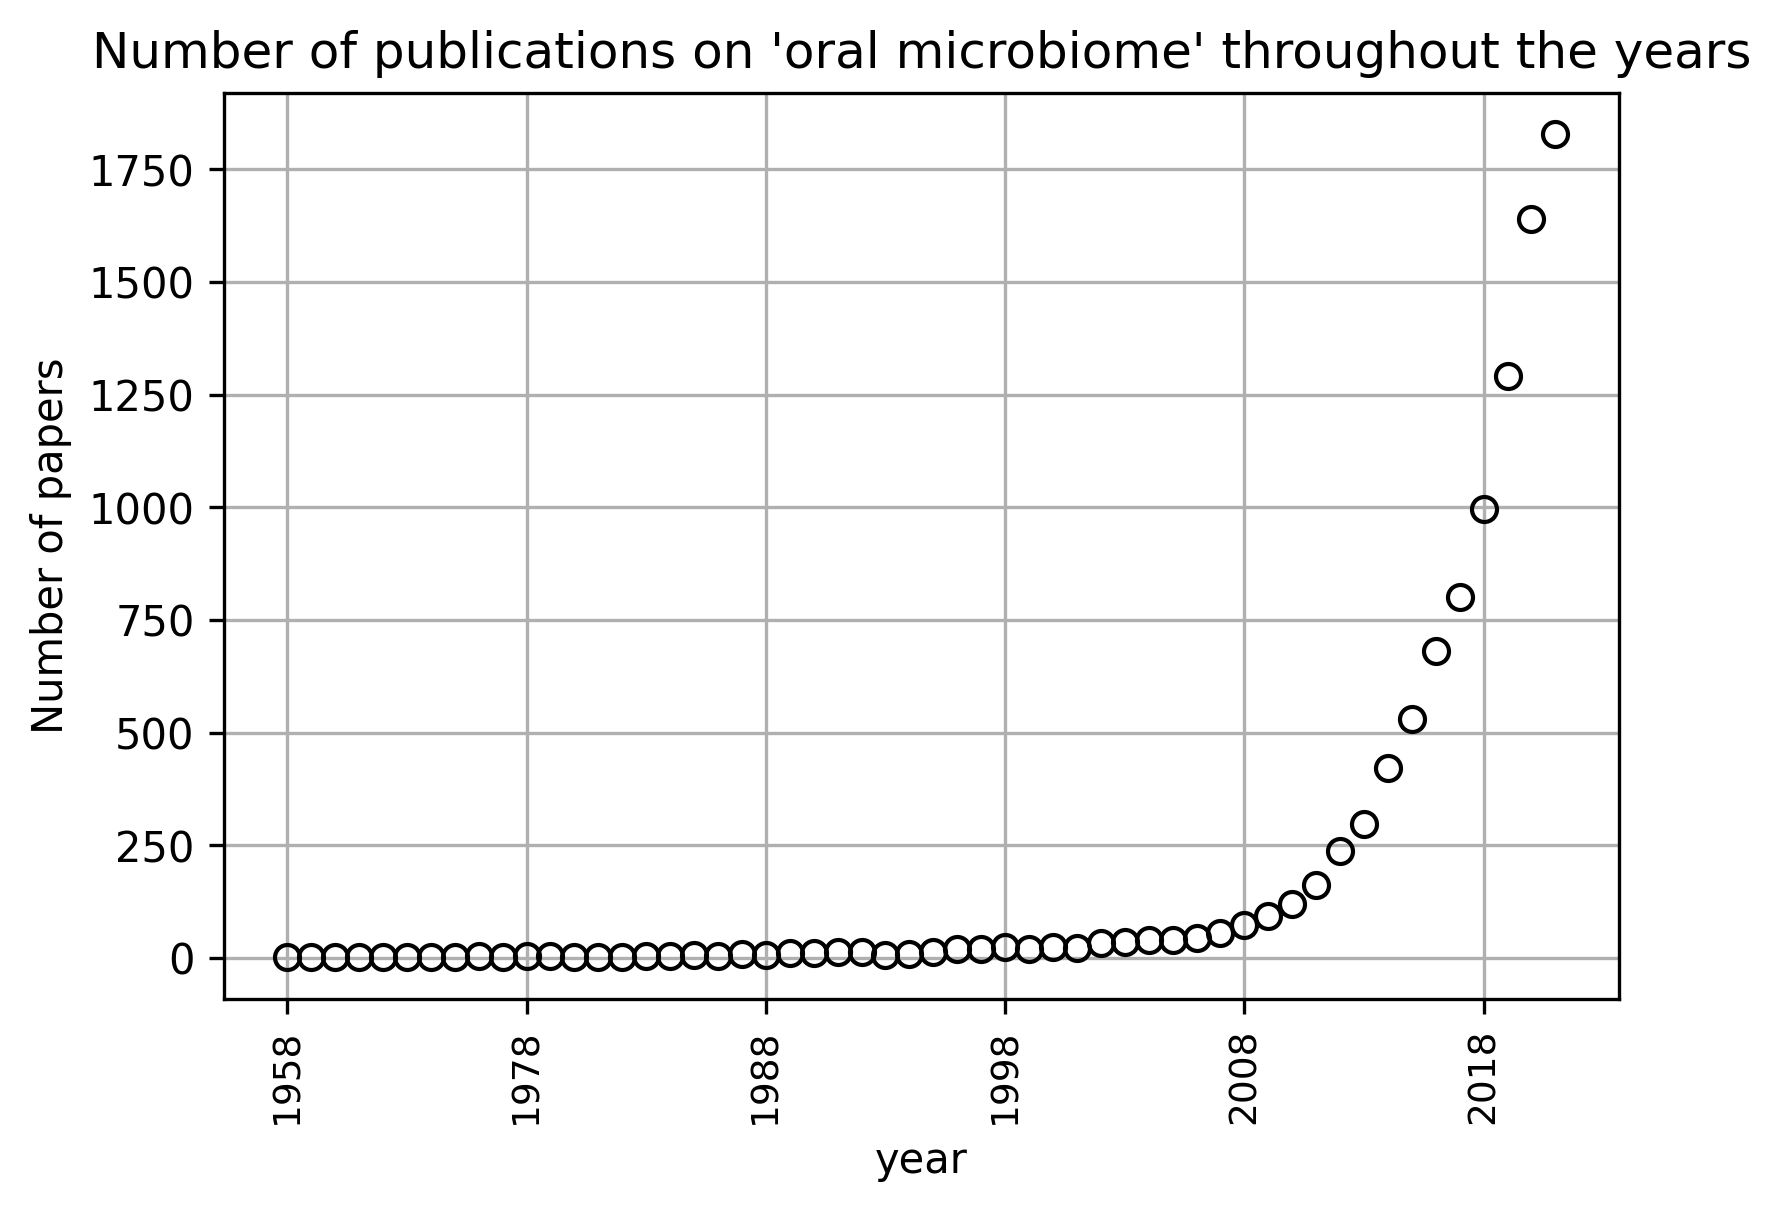

In [50]:

paper_count.plot(style='o', legend=False, color='k', markerfacecolor='none')
#plt.style.use('seaborn')
#plt.figure(figsize=(10,5))
#plt.rcParams["figure.figsize"] = [8.0, 3.0]
plt.rcParams["figure.dpi"] = 300
plt.ylabel('Number of papers')
plt.xticks(fontsize=9.0, rotation=90)
plt.grid()
plt.title("Number of publications on 'oral microbiome' throughout the years")
plt.show()

In [26]:
paper_count.to_csv("paper_count.csv")

In [8]:
df1 = pd.read_csv("paper_count.csv")

#adding extra ticks using matplotlib

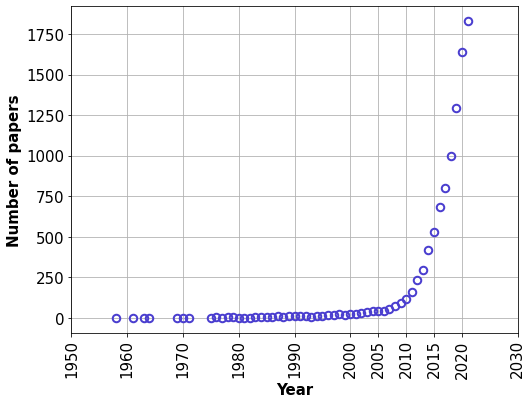

In [36]:
plt.figure(figsize=(8,6))
lines = plt.plot(df1['year'],df1['count'], 'o', color='#4a3ecf', markerfacecolor='none', markeredgewidth=2, markersize=7.5)
#adding extra ticks using matplotlib
#see: https://stackoverflow.com/questions/14716660/adding-extra-axis-ticks-using-matplotlib
#ax = lines[0].axes
extraticks = [2005,2015]
#ax.set_xticks(list(ax.get_xticks()) + extraticks)
plt.xticks(list(plt.xticks()[0]) + extraticks)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of papers', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
#plt.title("Number of publications on 'oral microbiome' throughout the years")
#add grid lines
plt.grid()
#plt.savefig("Figure1.png")
plt.show()